In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset
df = pd.read_csv('Add_sales_data_2018.csv')

In [3]:
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
df.isna().any()

Date                    False
Add1(in Thousands)      False
Add2(in Thousands)      False
Add3(in Thousands)      False
Add4(in Thousands)      False
Add5(in Thousands)      False
Profit(in Thousands)    False
dtype: bool

In [5]:
df.shape

(205, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7955F8FD0>,
      dtype=object)

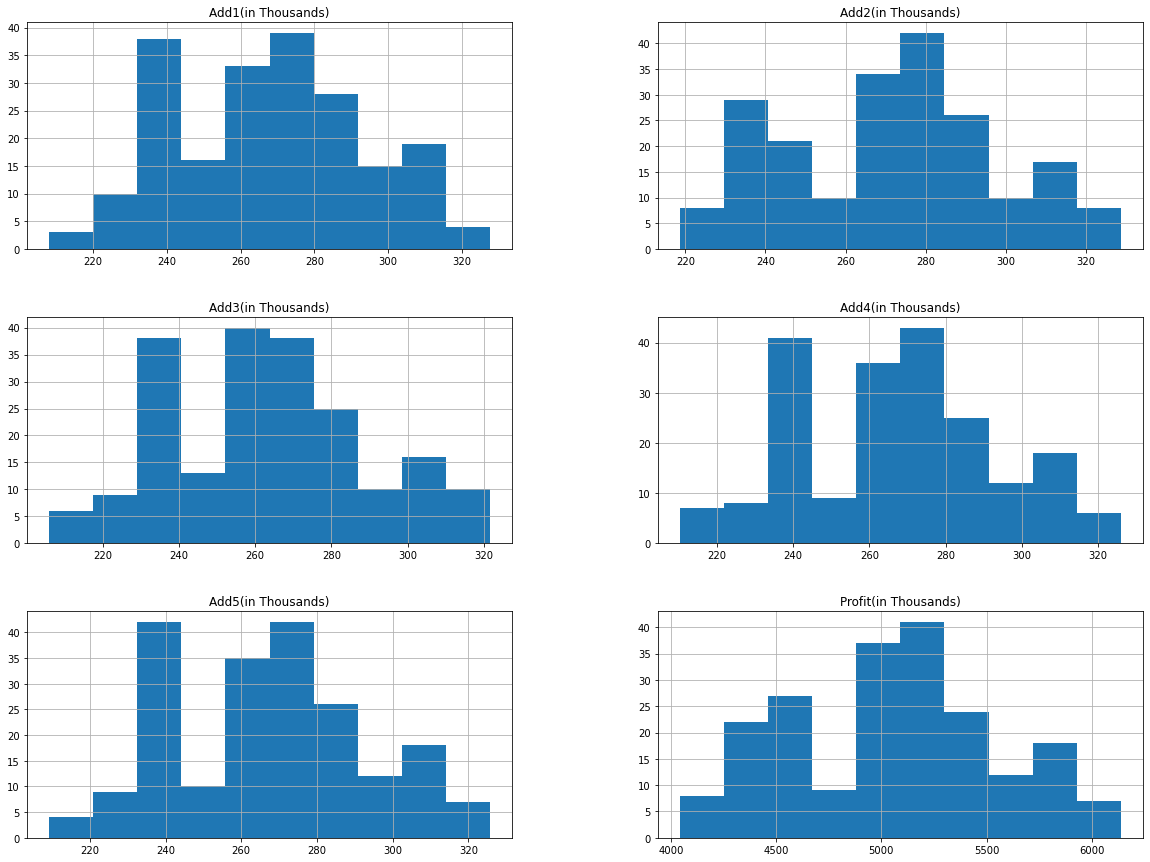

In [7]:
df.hist(figsize=(20,15))

In [8]:
correlation_matrix = df.corr()

## 1. Relationship between the amount spent for advertising through five different companies and profit  generated.

In [9]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

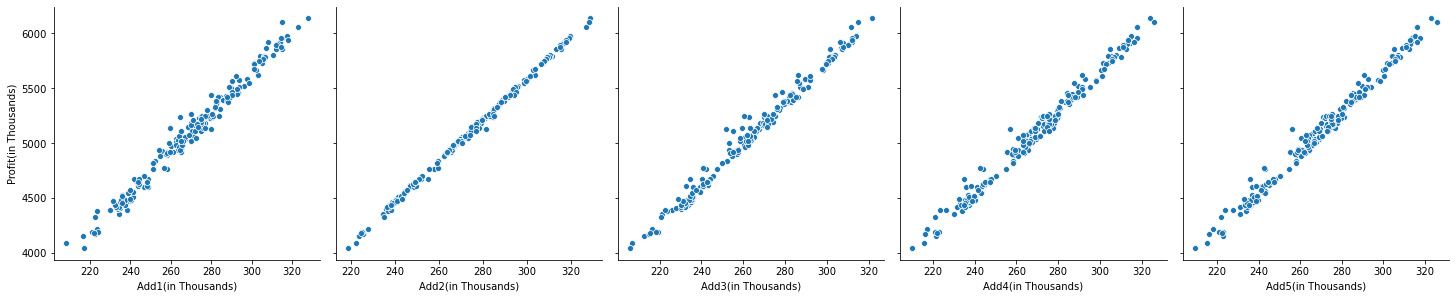

In [10]:
sns.pairplot(df, x_vars=['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'], y_vars='Profit(in Thousands)', height=4, aspect=1, kind='scatter')
plt.show()

## Correlation

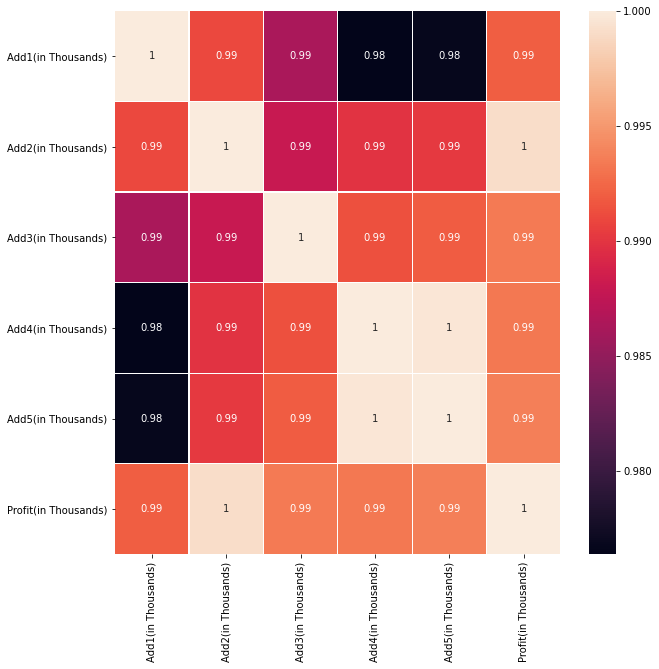

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,linewidths=0.2)

## Build a regression model

In [12]:
df.columns


Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [13]:
X = df.drop(columns=['Profit(in Thousands)','Date'])
y = df['Profit(in Thousands)']
X.head()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


In [14]:
y.head()

0    4093.065
1    4042.448
2    4213.819
3    4391.665
4    4350.683
Name: Profit(in Thousands), dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25)

In [16]:
# Building LinearRegression classifier
from sklearn import linear_model
clr = linear_model.LinearRegression()

In [17]:
#LASSO regression model
lasso = linear_model.Lasso(alpha=0.001)

In [18]:
# Creating Linear Regression and LASSO Model
model = clr.fit(X_train,y_train)
model_lasso = lasso.fit(X_train,y_train)

## Predictions

In [19]:
predictions = model.predict(X_test)
predictions_lasso = model_lasso.predict(X_test)

In [20]:
#Checking Error
from sklearn.metrics import mean_squared_error

print(f"MSE of Linear Regression Model is {mean_squared_error(y_test,predictions)}")
print(f"MSE LASSO regression model is {mean_squared_error(y_test,predictions_lasso)}")

MSE of Linear Regression Model is 6.999220567756388e-25
MSE LASSO regression model is 0.6570588753832494


In [21]:
from sklearn.metrics import r2_score

print(f"R^2 of Linear Regression model: {r2_score(predictions,y_test)}")
print(f"R^2 of LASSO model: {r2_score(predictions_lasso,y_test)}")

R^2 of Linear Regression model: 1.0
R^2 of LASSO model: 0.9999969453438851


In [22]:
# From MSE we can see that the error is too small and hence our model pretty good

## Predict the profit generated by the company

In [23]:
#Linear Regression model prediction
model.predict([[290,312,309,298,320]])

array([5820.06])

In [24]:
#Lasso regression model prediction
model_lasso.predict([[290,312,309,298,320]])

array([5802.08023723])